<a href="https://colab.research.google.com/github/karolkruszynski/AvocadoPriceDA/blob/main/Avocado_Prices_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Load & Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Avocado_HassAvocadoBoard_20152023v1.0.1.csv")

In [4]:
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


In [7]:
df.isnull().sum()

Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Date            0
AveragePrice    0
TotalVolume     0
plu4046         0
plu4225         0
plu4770         0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
region          0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df['Date'].dtype

dtype('<M8[ns]')

In [14]:
df['Date']

0       2015-01-04
1       2015-01-04
2       2015-01-04
3       2015-01-04
4       2015-01-04
           ...    
41020   2021-11-28
41021   2021-11-28
41022   2021-11-28
41023   2021-11-28
41024   2021-11-28
Name: Date, Length: 41025, dtype: datetime64[ns]

In [15]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [16]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [17]:
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region,Year,Month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany,2015,1
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany,2015,1
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta,2015,1
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta,2015,1
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington,2015,1



# Basic statistics

1. Calculate the mean, median, standard deviation and quartiles for the "Average Price" column.

In [19]:
avg_price = df['AveragePrice'].mean()
avg_price.round(2)

1.42

In [23]:
median_price = df['AveragePrice'].median()
median_price.round(2)

1.39

In [25]:
standard_deviation = df['AveragePrice'].std()
standard_deviation.round(2)

0.39

In [27]:
price_quantile = df['AveragePrice'].quantile()
price_quantile.round(2)

1.39

2. Calculate the sum, average and maximum value for the "Total Volume" column.

In [31]:
sum_total_value = df['TotalVolume'].sum()
sum_total_value.round(0)

35457661880.0

In [32]:
avg_total_value = df['TotalVolume'].mean()
avg_total_value.round(0)

864294.0

In [33]:
max_total_value = df['TotalVolume'].max()
max_total_value.round(0)

61034457.0

# Avocado price trends

1. Create a time chart showing average avocado prices over time (relating to the "Date" and "AveragePrice" columns).

<Axes: xlabel='Year'>

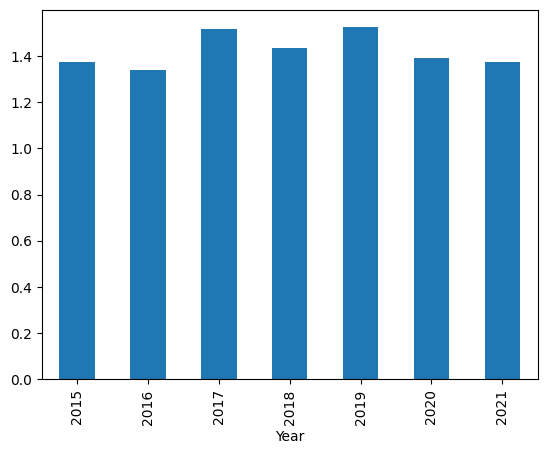

In [34]:
avg_price_by_year = df.groupby('Year')['AveragePrice'].mean()
avg_price_by_year.plot(kind='bar')

2. Check if there is a seasonal price trend for avocados in your region

<Axes: xlabel='Season'>

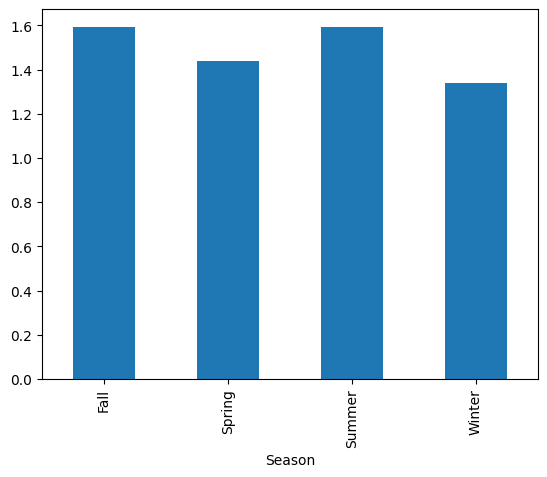

In [60]:
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))
df['Season'].value_counts()
avg_price_by_region = df.groupby('region')['AveragePrice'].mean()
avg_price_by_season = df.groupby('Season')['AveragePrice'].mean()
avg_price_by_season_and_region = df.groupby(['region', 'Season'])['AveragePrice'].mean()
avg_price_by_season_and_region['California'].plot(kind='bar')

Answer: For California Avocado prices are highest in fall and summer, but the cheapest unit price is in winter

# Distribution of avocado types

1. Calculate the percentage share of each type of avocado ("plu"s columns) in total sales.

In [88]:
df.columns

Index(['Date', 'AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'region',
       'Year', 'Month', 'Season'],
      dtype='object')

Solo plus types percentage calculation

In [81]:
percentage_share_of_plu_plu4046 = df['plu4046'].sum() / df['TotalVolume'].sum() * 100
percentage_share_of_plu_plu4046.round(2)

31.81

In [82]:
percentage_share_of_plu_plu4225 = df['plu4225'].sum() / df['TotalVolume'].sum() * 100
percentage_share_of_plu_plu4225.round(2)

27.14

In [83]:
percentage_share_of_plu_plu4770 = df['plu4770'].sum() / df['TotalVolume'].sum() * 100
percentage_share_of_plu_plu4770.round(2)

2.12

All plus types percentage calculation in 1 piece of code

In [86]:
sum_of_plu_sale_types = df[['plu4046', 'plu4225', 'plu4770']].sum() / df['TotalVolume'].sum() * 100
sum_of_plu_sale_types.round(2)

plu4046    31.81
plu4225    27.14
plu4770     2.12
dtype: float64

Sum of all plus types shares in TotalVolume.

In [87]:
sum_of_plu_sale_types.sum().round(2)

61.08

2. Plot your results in a pie chart.

<Axes: >

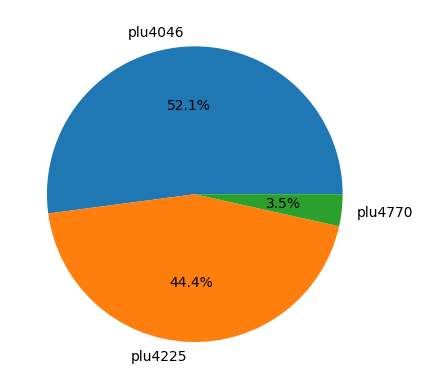

In [90]:
sum_of_plu_sale_types.plot(kind='pie', autopct='%1.1f%%')

# Region analysis

1. Identify the regions with the highest and lowest average avocado prices.

In [95]:
lowest_region_avg_price = df.groupby('region')['AveragePrice'].min()
lowest_region_avg_price.sort_values(ascending=True).head(1)

region
CincinnatiDayton    0.44
Name: AveragePrice, dtype: float64

In [96]:
highest_region_avg_price = df.groupby('region')['AveragePrice'].max()
highest_region_avg_price.sort_values(ascending=False).head(1)

region
SanFrancisco    3.25
Name: AveragePrice, dtype: float64

2. Present this information in a bar chart.

In [99]:
head_highest_region_avg_price = highest_region_avg_price.sort_values(ascending=False).head(1)
head_lowest_region_avg_price = lowest_region_avg_price.sort_values(ascending=True).head(1)

<Axes: xlabel='region'>

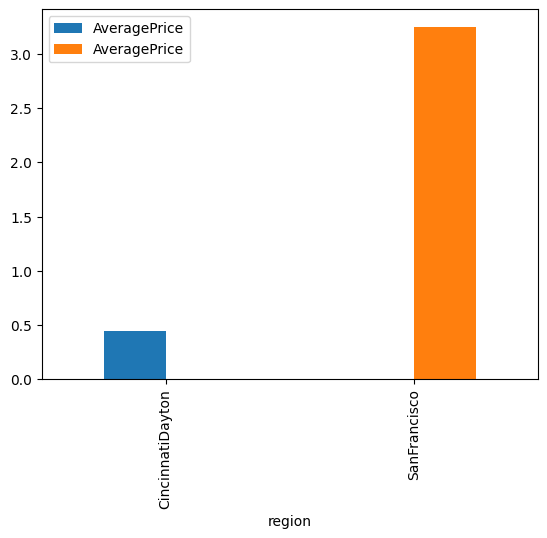

In [100]:
lowest_and_highest_region_avg_price = pd.concat([head_lowest_region_avg_price, head_highest_region_avg_price], axis=1)
lowest_and_highest_region_avg_price.plot(kind='bar')

# Correlation between variables

1. Check the correlation between "TotalVolume" and "AveragePrice".

In [102]:
corr_totalvolume_averageprice = df['TotalVolume'].corr(df['AveragePrice'])
corr_totalvolume_averageprice

-0.18613084125439627

2. See if there is a relationship between the prices of different types of avocados (plu4046, plu4225, plu4770) and total sales.

In [104]:
corr_plu4046_averageprice = df['plu4046'].corr(df['AveragePrice'])
corr_plu4046_averageprice

-0.20246847986431238

In [105]:
corr_plu4225_averageprice = df['plu4225'].corr(df['AveragePrice'])
corr_plu4225_averageprice

-0.15937954923428674

In [108]:
corr_plu4770_averageprice = df['plu4770'].corr(df['AveragePrice'])
corr_plu4770_averageprice

-0.1678813425963638

# Cumulative avocado sales

1. Create a new column that will contain the cumulative total of avocado sales in a given region.

In [109]:
df['CumulativeTotalVolume'] = df['TotalVolume'].groupby(df['region']).cumsum()

In [115]:
df.loc[df['region'] == 'California', 'CumulativeTotalVolume'].max()

2193436026.65

# Monthly analysis

1. Identify the months with the highest and lowest avocado sales.

In [124]:
highest_avocado_sales_by_month = df.groupby('Month')['TotalVolume'].sum()
highest_avocado_sales_by_month[highest_avocado_sales_by_month == highest_avocado_sales_by_month.max()].index[0]

5

In [126]:
lowest_avocado_sales_by_month = df.groupby('Month')['TotalVolume'].sum()
lowest_avocado_sales_by_month[lowest_avocado_sales_by_month == lowest_avocado_sales_by_month.min()].index[0]

12

2. Plot these results on a graph.

<Axes: xlabel='Month'>

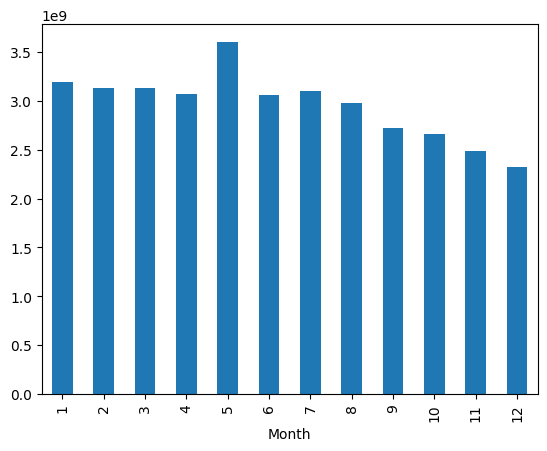

In [128]:
highest_avocado_sales_by_month.plot(kind='bar') # Here we can also use lowerst_avocado_sales_by_month.plot(kind='bar') it doesn't metter we have same results.

# Distribution of bags per region

1. Calculate the average number of bags (SmallBags, LargeBags, XLargeBags) per region.

In [130]:
df.columns

Index(['Date', 'AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'region',
       'Year', 'Month', 'Season', 'CumulativeTotalVolume'],
      dtype='object')

In [ ]:
small_bags_per_region = df.groupby('region')['SmallBags', 'LargeBags', 'XLargeBags'].sum()
small_bags_per_region.sort_values(by='XLargeBags', ascending=False)

2. Plot the results on a radar chart.

In [169]:
import plotly.express as px
small_bags_per_region_top10 = small_bags_per_region.sort_values(by='XLargeBags', ascending=False).head(10)
theta = [
'GreatLakes',
'SouthCentral',
'California',
'Southeast',
'West',
'LosAngeles',
'Midsouth',
'Plains',
'Northeast']
r = [
small_bags_per_region_top10['XLargeBags'].iloc[1],
small_bags_per_region_top10['XLargeBags'].iloc[2],
small_bags_per_region_top10['XLargeBags'].iloc[3],
small_bags_per_region_top10['XLargeBags'].iloc[4],
small_bags_per_region_top10['XLargeBags'].iloc[5],
small_bags_per_region_top10['XLargeBags'].iloc[6],
small_bags_per_region_top10['XLargeBags'].iloc[7],
small_bags_per_region_top10['XLargeBags'].iloc[8],
small_bags_per_region_top10['XLargeBags'].iloc[9]]
px.line_polar(small_bags_per_region, r=r, theta=theta)

Adnotations: I only selected the top 10 regions for better readability of the chart and excluded TotalUS from the visualization

# Influence of type on price

1. Compare average avocado prices depending on type. (type columns)

In [174]:
df.columns

Index(['Date', 'AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'region',
       'Year', 'Month', 'Season', 'CumulativeTotalVolume'],
      dtype='object')

In [176]:
avg_price_by_type = df.groupby('type')['AveragePrice'].mean()
avg_price_by_type

type
conventional    1.160254
organic         1.687042
Name: AveragePrice, dtype: float64

2. Create a bar chart showing these differences

<Axes: xlabel='type', ylabel='AveragePrice'>

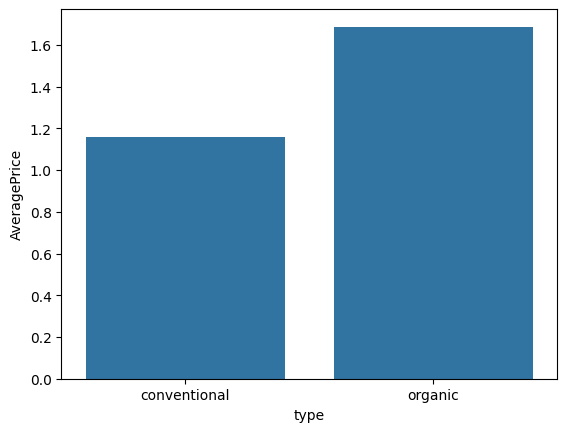

In [177]:
sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type)

# Analysis of price changes over time

1. Calculate the percentage change in avocado prices from the previous period. ( 6 months period )

The version of the code I made initially was long and inefficient.


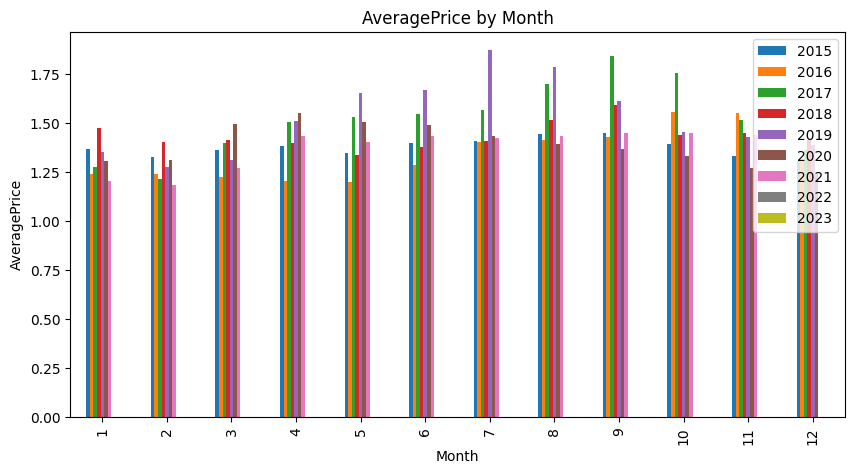

In [203]:
price_2015 = df[df['Year'] == 2015]
price_2015
year_2015 = price_2015.groupby('Month')['AveragePrice'].mean()
price_2016 = df[df['Year'] == 2016]
year_2016 = price_2016.groupby('Month')['AveragePrice'].mean()
price_2017 = df[df['Year'] == 2017]
year_2017 = price_2017.groupby('Month')['AveragePrice'].mean()
price_2018 = df[df['Year'] == 2018]
year_2018 = price_2018.groupby('Month')['AveragePrice'].mean()
price_2019 = df[df['Year'] == 2019]
year_2019 = price_2019.groupby('Month')['AveragePrice'].mean()
price_2020 = df[df['Year'] == 2020]
year_2020 = price_2020.groupby('Month')['AveragePrice'].mean()
price_2021 = df[df['Year'] == 2021]
year_2021 = price_2021.groupby('Month')['AveragePrice'].mean()
price_2022 = df[df['Year'] == 2022]
year_2022 = price_2022.groupby('Month')['AveragePrice'].mean()
price_2023 = df[df['Year'] == 2023]
year_2023 = price_2023.groupby('Month')['AveragePrice'].mean()
agg_years = pd.concat([year_2015, year_2016, year_2017, year_2018, year_2019, year_2020, year_2021, year_2022, year_2023], axis=1)
ax = agg_years.plot(kind='bar', legend=True, figsize=(10, 5), xlabel='Month', ylabel='AveragePrice', title='AveragePrice by Month')
ax.legend(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], loc='best')

A version of the code based on for and range loops

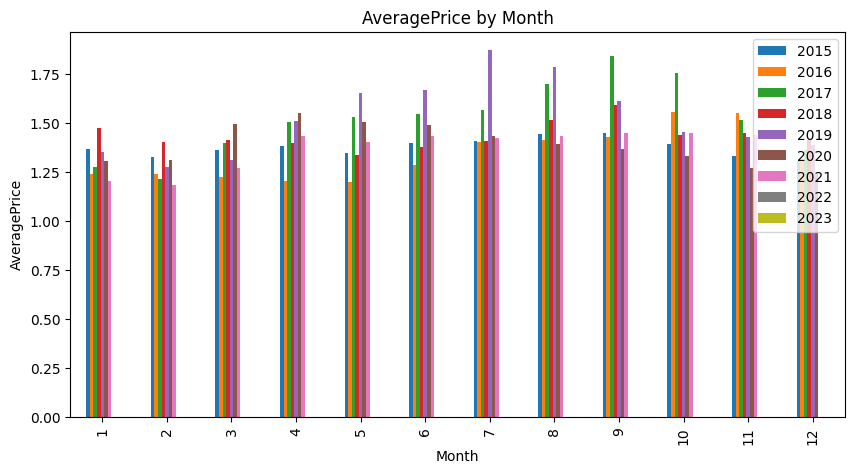

In [206]:
years = list(range(2015, 2024))

agg_years = pd.DataFrame()

for year in years:
    price_year = df[df['Year'] == year]
    year_data = price_year.groupby('Month')['AveragePrice'].mean()
    agg_years[year] = year_data

ax = agg_years.plot(kind='bar', figsize=(10, 5), xlabel='Month', ylabel='AveragePrice', title='AveragePrice by Month')

ax.legend([str(year) for year in years], loc='best')

plt.show()